In [258]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt
from math import sqrt
from sklearn.feature_selection import VarianceThreshold
from sklearn.preprocessing import StandardScaler

# Label Encoding
from sklearn.preprocessing import LabelEncoder
# Modeling & Accuracy Metrics
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
# import xgboost as xgb
from sklearn.datasets import load_boston
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [259]:
#reading data
data=pd.read_csv("H2HBABBA1533.csv")

In [260]:
#checking for null value in column
data.isnull().sum()

business_code                 0
cust_number                   0
name_customer                 0
clear_date                10000
buisness_year                 0
doc_id                        0
posting_date                  0
document_create_date          0
document_create_date.1        0
due_in_date                   0
invoice_currency              0
document type                 0
posting_id                    0
area_business             50000
total_open_amount             0
baseline_create_date          0
cust_payment_terms            0
invoice_id                    4
isOpen                        0
dtype: int64

In [261]:
#Where clear_date != null is putted into train dataframe
train = data.loc[data['clear_date'].notnull()]
train.shape

(40000, 19)

In [262]:
#Where clear_date == null is putted into test dataframe
test = data.loc[data.clear_date.isnull()]
test.shape

(10000, 19)

In [263]:
#taken for recall train dataframe
temp_test_data = data.loc[data.clear_date.isnull()]
temp_test_data.shape

(10000, 19)

In [264]:
#checking for null values inside train
train.isnull().sum()

business_code                 0
cust_number                   0
name_customer                 0
clear_date                    0
buisness_year                 0
doc_id                        0
posting_date                  0
document_create_date          0
document_create_date.1        0
due_in_date                   0
invoice_currency              0
document type                 0
posting_id                    0
area_business             40000
total_open_amount             0
baseline_create_date          0
cust_payment_terms            0
invoice_id                    4
isOpen                        0
dtype: int64

In [265]:
#area_business column is full of null value and invoice_id has no requarement for training . so droped
train.drop(columns=['area_business','invoice_id'],inplace=True)
train.isnull().sum()

c:\users\telecom division\appdata\local\programs\python\python39\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


business_code             0
cust_number               0
name_customer             0
clear_date                0
buisness_year             0
doc_id                    0
posting_date              0
document_create_date      0
document_create_date.1    0
due_in_date               0
invoice_currency          0
document type             0
posting_id                0
total_open_amount         0
baseline_create_date      0
cust_payment_terms        0
isOpen                    0
dtype: int64

In [266]:
data['document type'].value_counts(normalize=True)


RV    0.99992
X2    0.00008
Name: document type, dtype: float64

In [267]:
#since we are getting rv as 0.999 so it is of no use so we can delete it
data.drop('document type',axis = 1,inplace = True)

In [268]:
data.head()

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date,document_create_date.1,due_in_date,invoice_currency,posting_id,area_business,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id,isOpen
0,U001,0200895843,US,2019-09-09 00:00:00,2019.0,1.929776e+09,2019-08-22,20190822,20190822,20190906.0,USD,1.0,NaN,41386.61,20190822.0,NAA8,1.929776e+09,0
1,U001,0200769623,WAL-MAR,2019-11-25 00:00:00,2019.0,1.930144e+09,2019-11-12,20191112,20191112,20191127.0,USD,1.0,NaN,47178.82,20191112.0,NAH4,1.930144e+09,0
2,U001,0200769623,WAL-MAR foundation,2019-04-23 00:00:00,2019.0,1.929131e+09,2019-04-12,20190411,20190412,20190427.0,USD,1.0,NaN,51389.52,20190412.0,NAH4,1.929131e+09,0
3,U001,0200769623,WAL-MAR co,2019-11-26 00:00:00,2019.0,1.930124e+09,2019-11-15,20191107,20191115,20191130.0,USD,1.0,NaN,18177.18,20191115.0,NAH4,1.930124e+09,0
4,U001,0200769623,WAL-MAR,NaN,2020.0,1.930737e+09,2020-04-03,20200403,20200403,20200418.0,USD,1.0,NaN,24079.57,20200403.0,NAH4,1.930737e+09,1


In [269]:
#sort the train data according to document_create_date.1
train.sort_values(['document_create_date.1'],inplace=True)
train.reset_index(inplace=True,drop=True)
train.head()

<ipython-input-269-c5b1ec83635a>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train.sort_values(['document_create_date.1'],inplace=True)


,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date,document_create_date.1,due_in_date,invoice_currency,document type,posting_id,total_open_amount,baseline_create_date,cust_payment_terms,isOpen
0,U001,0200772670,ASSOCIAT associates,2019-01-14 00:00:00,2019.0,1.928543e+09,2018-12-30,20181230,20181230,20190114.0,USD,RV,1.0,12798.71,20181230.0,NAU5,0
1,CA02,0140105785,SHOPPE associates,2019-01-18 00:00:00,2019.0,2.960520e+09,2018-12-30,20181230,20181230,20190113.0,CAD,RV,1.0,46528.10,20190103.0,CA10,0
2,U001,0200769623,WAL-MAR systems,2019-01-10 00:00:00,2019.0,1.928545e+09,2018-12-30,20181231,20181230,20190114.0,USD,RV,1.0,504.19,20181230.0,NAH4,0
3,U001,0200759878,SA corp,2019-01-15 00:00:00,2019.0,1.928540e+09,2018-12-30,20181229,20181230,20190114.0,USD,RV,1.0,18215.19,20181230.0,NAH4,0
4,U001,0200744019,TARG in,2019-01-11 00:00:00,2019.0,1.928534e+09,2018-12-30,20181229,20181230,20190114.0,USD,RV,1.0,9787.68,20181230.0,NAA8,0


In [270]:
# temp_constant_check is taken for constant checking pourpose
temp_constant_check = train.drop(labels=['cust_number','business_code','name_customer','clear_date','posting_date','invoice_currency','document type','cust_payment_terms'], axis=1)
temp_constant_check.dtypes

buisness_year             float64
doc_id                    float64
document_create_date        int64
document_create_date.1      int64
due_in_date               float64
posting_id                float64
total_open_amount         float64
baseline_create_date      float64
isOpen                      int64
dtype: object

In [271]:
temp_constant_check.head()

,buisness_year,doc_id,document_create_date,document_create_date.1,due_in_date,posting_id,total_open_amount,baseline_create_date,isOpen
0,2019.0,1.928543e+09,20181230,20181230,20190114.0,1.0,12798.71,20181230.0,0
1,2019.0,2.960520e+09,20181230,20181230,20190113.0,1.0,46528.10,20190103.0,0
2,2019.0,1.928545e+09,20181231,20181230,20190114.0,1.0,504.19,20181230.0,0
3,2019.0,1.928540e+09,20181229,20181230,20190114.0,1.0,18215.19,20181230.0,0
4,2019.0,1.928534e+09,20181229,20181230,20190114.0,1.0,9787.68,20181230.0,0


In [272]:
#checking for quasi-constant 
sel = VarianceThreshold(
    threshold=0.01)

sel.fit(temp_constant_check)
sum(sel.get_support())

7

In [273]:
# finally we can print the quasi-constant features
print(
    len([
        x for x in temp_constant_check.columns
        if x not in temp_constant_check.columns[sel.get_support()]
    ]))

[x for x in temp_constant_check.columns if x not in temp_constant_check.columns[sel.get_support()]]

2


['posting_id', 'isOpen']

In [274]:
#quasi-constant are removed
train.drop(columns=['posting_id','isOpen'],inplace=True)

c:\users\telecom division\appdata\local\programs\python\python39\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [275]:
#clear_date,posting_date,document_create_date.1,due_in_date are converted into datetime format for future operation
train['clear_date'] = pd.to_datetime(train['clear_date'])
train['posting_date'] = pd.to_datetime(train['posting_date']) 
train['document_create_date.1'] = pd.to_datetime(train['document_create_date.1'], format='%Y%m%d')
train['due_in_date'] = pd.to_datetime(train['due_in_date'], format='%Y%m%d')
train.head()

<ipython-input-275-26ef13c575cd>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['clear_date'] = pd.to_datetime(train['clear_date'])
<ipython-input-275-26ef13c575cd>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['posting_date'] = pd.to_datetime(train['posting_date'])
<ipython-input-275-26ef13c575cd>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date,document_create_date.1,due_in_date,invoice_currency,document type,total_open_amount,baseline_create_date,cust_payment_terms
0,U001,0200772670,ASSOCIAT associates,2019-01-14,2019.0,1.928543e+09,2018-12-30,20181230,2018-12-30,2019-01-14,USD,RV,12798.71,20181230.0,NAU5
1,CA02,0140105785,SHOPPE associates,2019-01-18,2019.0,2.960520e+09,2018-12-30,20181230,2018-12-30,2019-01-13,CAD,RV,46528.10,20190103.0,CA10
2,U001,0200769623,WAL-MAR systems,2019-01-10,2019.0,1.928545e+09,2018-12-30,20181231,2018-12-30,2019-01-14,USD,RV,504.19,20181230.0,NAH4
3,U001,0200759878,SA corp,2019-01-15,2019.0,1.928540e+09,2018-12-30,20181229,2018-12-30,2019-01-14,USD,RV,18215.19,20181230.0,NAH4
4,U001,0200744019,TARG in,2019-01-11,2019.0,1.928534e+09,2018-12-30,20181229,2018-12-30,2019-01-14,USD,RV,9787.68,20181230.0,NAA8


In [276]:
#DELAY is calculated by (clear_date-due_in_date)
train['DELAY']=train['clear_date'] - train['due_in_date']
train.head()

<ipython-input-276-d04a539d7769>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['DELAY']=train['clear_date'] - train['due_in_date']


,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date,document_create_date.1,due_in_date,invoice_currency,document type,total_open_amount,baseline_create_date,cust_payment_terms,DELAY
0,U001,0200772670,ASSOCIAT associates,2019-01-14,2019.0,1.928543e+09,2018-12-30,20181230,2018-12-30,2019-01-14,USD,RV,12798.71,20181230.0,NAU5,0 days
1,CA02,0140105785,SHOPPE associates,2019-01-18,2019.0,2.960520e+09,2018-12-30,20181230,2018-12-30,2019-01-13,CAD,RV,46528.10,20190103.0,CA10,5 days
2,U001,0200769623,WAL-MAR systems,2019-01-10,2019.0,1.928545e+09,2018-12-30,20181231,2018-12-30,2019-01-14,USD,RV,504.19,20181230.0,NAH4,-4 days
3,U001,0200759878,SA corp,2019-01-15,2019.0,1.928540e+09,2018-12-30,20181229,2018-12-30,2019-01-14,USD,RV,18215.19,20181230.0,NAH4,1 days
4,U001,0200744019,TARG in,2019-01-11,2019.0,1.928534e+09,2018-12-30,20181229,2018-12-30,2019-01-14,USD,RV,9787.68,20181230.0,NAA8,-3 days


In [277]:
train[train['invoice_currency'] == 'CAD']

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date,document_create_date.1,due_in_date,invoice_currency,document type,total_open_amount,baseline_create_date,cust_payment_terms,DELAY
1,CA02,0140105785,SHOPPE associates,2019-01-18,2019.0,2.960520e+09,2018-12-30,20181230,2018-12-30,2019-01-13,CAD,RV,46528.10,20190103.0,CA10,5 days
43,CA02,0140105785,SHOPPE,2019-01-18,2019.0,2.960520e+09,2018-12-30,20181230,2018-12-30,2019-01-12,CAD,RV,36208.89,20190102.0,CA10,6 days
59,CA02,0140105847,GORDON F in,2019-01-14,2019.0,2.960521e+09,2018-12-30,20181230,2018-12-30,2019-01-12,CAD,RV,18061.92,20190102.0,CA10,2 days
68,CA02,0140106408,WAL-M systems,2019-01-25,2019.0,2.960521e+09,2018-12-31,20181231,2018-12-31,2019-01-10,CAD,RV,1615.48,20181231.0,CA10,15 days
85,CA02,0140105686,SYSC associates,2019-01-17,2019.0,2.960520e+09,2018-12-31,20181231,2018-12-31,2019-01-13,CAD,RV,87994.08,20190103.0,CA10,4 days
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39902,CA02,0140105686,SYSC llc,2020-03-19,2020.0,2.960616e+09,2020-02-26,20200226,2020-02-26,2020-03-15,CAD,RV,77848.01,20200305.0,CA10,4 days
39916,CA02,0140105847,GORDON F associates,2020-03-09,2020.0,2.960614e+09,2020-02-26,20200226,2020-02-26,2020-03-08,CAD,RV,5518.10,20200227.0,CA10,1 days
39942,CA02,0140106408,WAL-M trust,2020-03-16,2020.0,2.960614e+09,2020-02-26,20200226,2020-02-26,2020-03-08,CAD,RV,17473.16,20200227.0,CA10,8 days
39943,CA02,0140104392,FLANAG us,2020-03-10,2020.0,2.960617e+09,2020-02-26,20200226,2020-02-26,2020-03-09,CAD,RV,32692.16,20200228.0,CA10,1 days


In [278]:
train.dtypes

business_code                      object
cust_number                        object
name_customer                      object
clear_date                 datetime64[ns]
buisness_year                     float64
doc_id                            float64
posting_date               datetime64[ns]
document_create_date                int64
document_create_date.1     datetime64[ns]
due_in_date                datetime64[ns]
invoice_currency                   object
document type                      object
total_open_amount                 float64
baseline_create_date              float64
cust_payment_terms                 object
DELAY                     timedelta64[ns]
dtype: object

In [279]:
#CAD are converted into USD currency
train['total_open_amount'] = np.where((train['invoice_currency'] == 'CAD') ,((train['total_open_amount'])*0.78),(train['total_open_amount']))

<ipython-input-279-5b3b7a0287f2>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['total_open_amount'] = np.where((train['invoice_currency'] == 'CAD') ,((train['total_open_amount'])*0.78),(train['total_open_amount']))


In [280]:
train['invoice_currency'] = 'USD'
train.head()

<ipython-input-280-c271b36bd3c0>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['invoice_currency'] = 'USD'


,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date,document_create_date.1,due_in_date,invoice_currency,document type,total_open_amount,baseline_create_date,cust_payment_terms,DELAY
0,U001,0200772670,ASSOCIAT associates,2019-01-14,2019.0,1.928543e+09,2018-12-30,20181230,2018-12-30,2019-01-14,USD,RV,12798.710,20181230.0,NAU5,0 days
1,CA02,0140105785,SHOPPE associates,2019-01-18,2019.0,2.960520e+09,2018-12-30,20181230,2018-12-30,2019-01-13,USD,RV,36291.918,20190103.0,CA10,5 days
2,U001,0200769623,WAL-MAR systems,2019-01-10,2019.0,1.928545e+09,2018-12-30,20181231,2018-12-30,2019-01-14,USD,RV,504.190,20181230.0,NAH4,-4 days
3,U001,0200759878,SA corp,2019-01-15,2019.0,1.928540e+09,2018-12-30,20181229,2018-12-30,2019-01-14,USD,RV,18215.190,20181230.0,NAH4,1 days
4,U001,0200744019,TARG in,2019-01-11,2019.0,1.928534e+09,2018-12-30,20181229,2018-12-30,2019-01-14,USD,RV,9787.680,20181230.0,NAA8,-3 days


In [281]:
train.head()

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date,document_create_date.1,due_in_date,invoice_currency,document type,total_open_amount,baseline_create_date,cust_payment_terms,DELAY
0,U001,0200772670,ASSOCIAT associates,2019-01-14,2019.0,1.928543e+09,2018-12-30,20181230,2018-12-30,2019-01-14,USD,RV,12798.710,20181230.0,NAU5,0 days
1,CA02,0140105785,SHOPPE associates,2019-01-18,2019.0,2.960520e+09,2018-12-30,20181230,2018-12-30,2019-01-13,USD,RV,36291.918,20190103.0,CA10,5 days
2,U001,0200769623,WAL-MAR systems,2019-01-10,2019.0,1.928545e+09,2018-12-30,20181231,2018-12-30,2019-01-14,USD,RV,504.190,20181230.0,NAH4,-4 days
3,U001,0200759878,SA corp,2019-01-15,2019.0,1.928540e+09,2018-12-30,20181229,2018-12-30,2019-01-14,USD,RV,18215.190,20181230.0,NAH4,1 days
4,U001,0200744019,TARG in,2019-01-11,2019.0,1.928534e+09,2018-12-30,20181229,2018-12-30,2019-01-14,USD,RV,9787.680,20181230.0,NAA8,-3 days


In [282]:
train['invoice_currency'].unique()

array(['USD'], dtype=object)

In [283]:
#As CAD was converted into USD so invoice_currency has no use so dropped
train.drop(columns=['invoice_currency'],inplace=True)
train.head()

c:\users\telecom division\appdata\local\programs\python\python39\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date,document_create_date.1,due_in_date,document type,total_open_amount,baseline_create_date,cust_payment_terms,DELAY
0,U001,0200772670,ASSOCIAT associates,2019-01-14,2019.0,1.928543e+09,2018-12-30,20181230,2018-12-30,2019-01-14,RV,12798.710,20181230.0,NAU5,0 days
1,CA02,0140105785,SHOPPE associates,2019-01-18,2019.0,2.960520e+09,2018-12-30,20181230,2018-12-30,2019-01-13,RV,36291.918,20190103.0,CA10,5 days
2,U001,0200769623,WAL-MAR systems,2019-01-10,2019.0,1.928545e+09,2018-12-30,20181231,2018-12-30,2019-01-14,RV,504.190,20181230.0,NAH4,-4 days
3,U001,0200759878,SA corp,2019-01-15,2019.0,1.928540e+09,2018-12-30,20181229,2018-12-30,2019-01-14,RV,18215.190,20181230.0,NAH4,1 days
4,U001,0200744019,TARG in,2019-01-11,2019.0,1.928534e+09,2018-12-30,20181229,2018-12-30,2019-01-14,RV,9787.680,20181230.0,NAA8,-3 days


In [284]:
#80% of train data will used for train_final and 20% is for validation pourpose
train_final, validation_intermediate = train_test_split(train,test_size=.2,shuffle=False)
train_final.shape,validation_intermediate.shape

((32000, 15), (8000, 15))

In [285]:
#20% validation data is splited 50% slab (in the sorted document_create_date.1)
validation_final,test_final = train_test_split(validation_intermediate,test_size=.5,shuffle=False)
validation_final.shape,test_final.shape

((4000, 15), (4000, 15))

####  Training for train_final 

In [286]:
[col for col in train_final.columns if train_final[col].isnull().sum() > 0]

[]

In [287]:
train_final.head()

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date,document_create_date.1,due_in_date,document type,total_open_amount,baseline_create_date,cust_payment_terms,DELAY
0,U001,0200772670,ASSOCIAT associates,2019-01-14,2019.0,1.928543e+09,2018-12-30,20181230,2018-12-30,2019-01-14,RV,12798.710,20181230.0,NAU5,0 days
1,CA02,0140105785,SHOPPE associates,2019-01-18,2019.0,2.960520e+09,2018-12-30,20181230,2018-12-30,2019-01-13,RV,36291.918,20190103.0,CA10,5 days
2,U001,0200769623,WAL-MAR systems,2019-01-10,2019.0,1.928545e+09,2018-12-30,20181231,2018-12-30,2019-01-14,RV,504.190,20181230.0,NAH4,-4 days
3,U001,0200759878,SA corp,2019-01-15,2019.0,1.928540e+09,2018-12-30,20181229,2018-12-30,2019-01-14,RV,18215.190,20181230.0,NAH4,1 days
4,U001,0200744019,TARG in,2019-01-11,2019.0,1.928534e+09,2018-12-30,20181229,2018-12-30,2019-01-14,RV,9787.680,20181230.0,NAA8,-3 days


In [288]:
len(temp_constant_check.columns[sel.get_support()])

7

<AxesSubplot:>

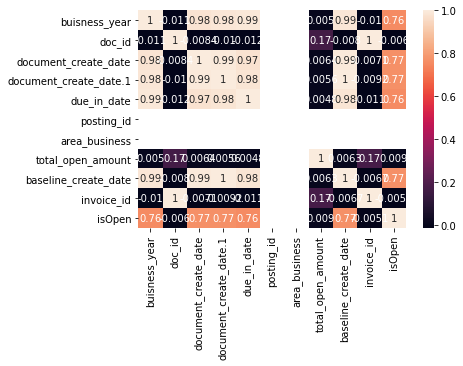

In [289]:
# corelation plot is done to eliminate some highly coorelated features
cor = data.corr()
sns.heatmap(cor, xticklabels=cor.columns, yticklabels=cor.columns, annot=True)

In [290]:
#removed corelated colum
train_final.drop(columns=['document_create_date','baseline_create_date'],inplace=True)

c:\users\telecom division\appdata\local\programs\python\python39\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


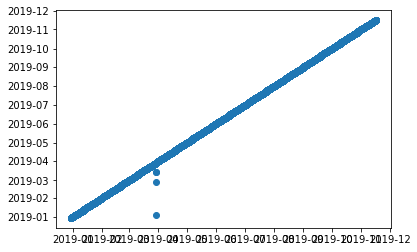

In [291]:
# posting_date,document_create_date.1 are making straightline graph so they are almost similar fetcher
plt.plot_date(train_final['posting_date'], train_final['document_create_date.1'])
plt.show()

In [292]:
#posting_date are removed for similarity with of document_create_date.1
train_final.drop(columns=['posting_date'],inplace=True)

c:\users\telecom division\appdata\local\programs\python\python39\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [293]:
train_final.shape

(32000, 12)

In [294]:
# doc_id, document type and name_customer are removed because they have no roll in training
train_final.drop(columns=['doc_id','document type','name_customer'],inplace=True)
train_final.head()

,business_code,cust_number,clear_date,buisness_year,document_create_date.1,due_in_date,total_open_amount,cust_payment_terms,DELAY
0,U001,0200772670,2019-01-14,2019.0,2018-12-30,2019-01-14,12798.710,NAU5,0 days
1,CA02,0140105785,2019-01-18,2019.0,2018-12-30,2019-01-13,36291.918,CA10,5 days
2,U001,0200769623,2019-01-10,2019.0,2018-12-30,2019-01-14,504.190,NAH4,-4 days
3,U001,0200759878,2019-01-15,2019.0,2018-12-30,2019-01-14,18215.190,NAH4,1 days
4,U001,0200744019,2019-01-11,2019.0,2018-12-30,2019-01-14,9787.680,NAA8,-3 days


In [295]:
# month_quarter,month are calculated for further use
train_final['document_create_date.1_month_quarter'] = train_final['document_create_date.1'].dt.quarter
train_final['due_in_date_month_quarter'] = train_final['due_in_date'].dt.quarter
train_final['document_create_date.1_month'] = train_final['document_create_date.1'].dt.month
train_final['due_in_date_month'] = train_final['due_in_date'].dt.month

train_final.head()

<ipython-input-295-8d76bd0d7c0c>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_final['document_create_date.1_month_quarter'] = train_final['document_create_date.1'].dt.quarter
<ipython-input-295-8d76bd0d7c0c>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_final['due_in_date_month_quarter'] = train_final['due_in_date'].dt.quarter
<ipython-input-295-8d76bd0d7c0c>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_index

,business_code,cust_number,clear_date,buisness_year,document_create_date.1,due_in_date,total_open_amount,cust_payment_terms,DELAY,document_create_date.1_month_quarter,due_in_date_month_quarter,document_create_date.1_month,due_in_date_month
0,U001,0200772670,2019-01-14,2019.0,2018-12-30,2019-01-14,12798.710,NAU5,0 days,4,1,12,1
1,CA02,0140105785,2019-01-18,2019.0,2018-12-30,2019-01-13,36291.918,CA10,5 days,4,1,12,1
2,U001,0200769623,2019-01-10,2019.0,2018-12-30,2019-01-14,504.190,NAH4,-4 days,4,1,12,1
3,U001,0200759878,2019-01-15,2019.0,2018-12-30,2019-01-14,18215.190,NAH4,1 days,4,1,12,1
4,U001,0200744019,2019-01-11,2019.0,2018-12-30,2019-01-14,9787.680,NAA8,-3 days,4,1,12,1


In [296]:
train_final.head()

,business_code,cust_number,clear_date,buisness_year,document_create_date.1,due_in_date,total_open_amount,cust_payment_terms,DELAY,document_create_date.1_month_quarter,due_in_date_month_quarter,document_create_date.1_month,due_in_date_month
0,U001,0200772670,2019-01-14,2019.0,2018-12-30,2019-01-14,12798.710,NAU5,0 days,4,1,12,1
1,CA02,0140105785,2019-01-18,2019.0,2018-12-30,2019-01-13,36291.918,CA10,5 days,4,1,12,1
2,U001,0200769623,2019-01-10,2019.0,2018-12-30,2019-01-14,504.190,NAH4,-4 days,4,1,12,1
3,U001,0200759878,2019-01-15,2019.0,2018-12-30,2019-01-14,18215.190,NAH4,1 days,4,1,12,1
4,U001,0200744019,2019-01-11,2019.0,2018-12-30,2019-01-14,9787.680,NAA8,-3 days,4,1,12,1


In [297]:
train_final.shape

(32000, 13)

In [298]:
# lablencoding is performed in business_code,cust_number and cust_payment_terms because they are catagorical column and can not passed into model
labelencoder = LabelEncoder()
train_final.iloc[:,0] = labelencoder.fit_transform(train_final.iloc[:,0])
train_final.iloc[:,1] = labelencoder.fit_transform(train_final.iloc[:,1])
train_final.iloc[:,7] = labelencoder.fit_transform(train_final.iloc[:,7])

c:\users\telecom division\appdata\local\programs\python\python39\lib\site-packages\pandas\core\indexing.py:1676: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)


In [299]:
train_final.head()

,business_code,cust_number,clear_date,buisness_year,document_create_date.1,due_in_date,total_open_amount,cust_payment_terms,DELAY,document_create_date.1_month_quarter,due_in_date_month_quarter,document_create_date.1_month,due_in_date_month
0,1,798,2019-01-14,2019.0,2018-12-30,2019-01-14,12798.710,48,0 days,4,1,12,1
1,0,376,2019-01-18,2019.0,2018-12-30,2019-01-13,36291.918,6,5 days,4,1,12,1
2,1,791,2019-01-10,2019.0,2018-12-30,2019-01-14,504.190,33,-4 days,4,1,12,1
3,1,770,2019-01-15,2019.0,2018-12-30,2019-01-14,18215.190,33,1 days,4,1,12,1
4,1,737,2019-01-11,2019.0,2018-12-30,2019-01-14,9787.680,21,-3 days,4,1,12,1


In [300]:
#clear_date,document_create_date.1,due_in_date are dropped because they are catagorical column and can not be passed into model
train_final.drop(columns=['clear_date','document_create_date.1','due_in_date'],inplace=True)
train_final['DELAY'] = train_final['DELAY'].dt.days
train_final.head()

c:\users\telecom division\appdata\local\programs\python\python39\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(
<ipython-input-300-1a49c618d5df>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_final['DELAY'] = train_final['DELAY'].dt.days


,business_code,cust_number,buisness_year,total_open_amount,cust_payment_terms,DELAY,document_create_date.1_month_quarter,due_in_date_month_quarter,document_create_date.1_month,due_in_date_month
0,1,798,2019.0,12798.710,48,0,4,1,12,1
1,0,376,2019.0,36291.918,6,5,4,1,12,1
2,1,791,2019.0,504.190,33,-4,4,1,12,1
3,1,770,2019.0,18215.190,33,1,4,1,12,1
4,1,737,2019.0,9787.680,21,-3,4,1,12,1


In [301]:
train_final.describe()

,business_code,cust_number,buisness_year,total_open_amount,cust_payment_terms,DELAY,document_create_date.1_month_quarter,due_in_date_month_quarter,document_create_date.1_month,due_in_date_month
count,32000.000000,32000.000000,32000.0,32000.000000,32000.000000,32000.000000,32000.000000,32000.000000,32000.000000,32000.000000
mean,0.976781,734.532156,2019.0,30842.226804,26.324375,1.130219,2.301969,2.463781,5.824063,6.343281
std,0.534791,242.151180,0.0,36983.790342,11.202922,11.513757,1.026586,1.042909,3.018933,3.018273
min,0.000000,0.000000,2019.0,0.860000,0.000000,-89.000000,1.000000,1.000000,1.000000,1.000000
25%,1.000000,649.000000,2019.0,4460.170650,21.000000,-3.000000,1.000000,2.000000,3.000000,4.000000
50%,1.000000,791.000000,2019.0,16786.680000,21.000000,0.000000,2.000000,2.000000,6.000000,6.000000
75%,1.000000,815.250000,2019.0,45633.602500,33.000000,2.000000,3.000000,3.000000,8.000000,9.000000
max,5.000000,1274.000000,2019.0,773749.610000,65.000000,258.000000,4.000000,4.000000,12.000000,12.000000


#### preparation in validation_final  dataframe for fitting into model

In [302]:
validation_final.drop(columns=['document_create_date','baseline_create_date'],inplace=True)
validation_final.head()

c:\users\telecom division\appdata\local\programs\python\python39\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date.1,due_in_date,document type,total_open_amount,cust_payment_terms,DELAY
32000,U001,0200719448,CREST associates,2019-12-02,2019.0,1.930151e+09,2019-11-16,2019-11-16,2019-12-01,RV,46882.08,NAA8,1 days
32001,U001,0200744019,TARG systems,2019-12-04,2019.0,1.930165e+09,2019-11-16,2019-11-16,2019-12-01,RV,45487.66,NAA8,3 days
32002,U001,0200769623,WAL-MAR llc,2019-11-29,2019.0,1.930162e+09,2019-11-16,2019-11-16,2019-12-01,RV,17951.54,NAH4,-2 days
32003,U001,0200759878,SA trust,2019-12-02,2019.0,1.930157e+09,2019-11-16,2019-11-16,2019-12-01,RV,7713.07,NAH4,1 days
32004,U001,0200769623,WAL-MAR associates,2019-11-27,2019.0,1.930161e+09,2019-11-16,2019-11-16,2019-12-01,RV,11648.83,NAH4,-4 days


In [303]:
validation_final.drop(columns=['posting_date'],inplace=True)
validation_final.head()

c:\users\telecom division\appdata\local\programs\python\python39\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,document_create_date.1,due_in_date,document type,total_open_amount,cust_payment_terms,DELAY
32000,U001,0200719448,CREST associates,2019-12-02,2019.0,1.930151e+09,2019-11-16,2019-12-01,RV,46882.08,NAA8,1 days
32001,U001,0200744019,TARG systems,2019-12-04,2019.0,1.930165e+09,2019-11-16,2019-12-01,RV,45487.66,NAA8,3 days
32002,U001,0200769623,WAL-MAR llc,2019-11-29,2019.0,1.930162e+09,2019-11-16,2019-12-01,RV,17951.54,NAH4,-2 days
32003,U001,0200759878,SA trust,2019-12-02,2019.0,1.930157e+09,2019-11-16,2019-12-01,RV,7713.07,NAH4,1 days
32004,U001,0200769623,WAL-MAR associates,2019-11-27,2019.0,1.930161e+09,2019-11-16,2019-12-01,RV,11648.83,NAH4,-4 days


In [304]:
validation_final['DELAY']=validation_final['clear_date'] - validation_final['due_in_date']
validation_final.head()

<ipython-input-304-c438f808a076>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  validation_final['DELAY']=validation_final['clear_date'] - validation_final['due_in_date']


,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,document_create_date.1,due_in_date,document type,total_open_amount,cust_payment_terms,DELAY
32000,U001,0200719448,CREST associates,2019-12-02,2019.0,1.930151e+09,2019-11-16,2019-12-01,RV,46882.08,NAA8,1 days
32001,U001,0200744019,TARG systems,2019-12-04,2019.0,1.930165e+09,2019-11-16,2019-12-01,RV,45487.66,NAA8,3 days
32002,U001,0200769623,WAL-MAR llc,2019-11-29,2019.0,1.930162e+09,2019-11-16,2019-12-01,RV,17951.54,NAH4,-2 days
32003,U001,0200759878,SA trust,2019-12-02,2019.0,1.930157e+09,2019-11-16,2019-12-01,RV,7713.07,NAH4,1 days
32004,U001,0200769623,WAL-MAR associates,2019-11-27,2019.0,1.930161e+09,2019-11-16,2019-12-01,RV,11648.83,NAH4,-4 days


In [305]:
validation_final.drop(columns=['doc_id','document type','name_customer'],inplace=True)
validation_final.head()

c:\users\telecom division\appdata\local\programs\python\python39\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


,business_code,cust_number,clear_date,buisness_year,document_create_date.1,due_in_date,total_open_amount,cust_payment_terms,DELAY
32000,U001,0200719448,2019-12-02,2019.0,2019-11-16,2019-12-01,46882.08,NAA8,1 days
32001,U001,0200744019,2019-12-04,2019.0,2019-11-16,2019-12-01,45487.66,NAA8,3 days
32002,U001,0200769623,2019-11-29,2019.0,2019-11-16,2019-12-01,17951.54,NAH4,-2 days
32003,U001,0200759878,2019-12-02,2019.0,2019-11-16,2019-12-01,7713.07,NAH4,1 days
32004,U001,0200769623,2019-11-27,2019.0,2019-11-16,2019-12-01,11648.83,NAH4,-4 days


In [306]:
# validation_final['clear_date_month_quarter'] = validation_final['clear_date'].dt.quarter
validation_final['document_create_date.1_month_quarter'] = validation_final['document_create_date.1'].dt.quarter
validation_final['due_in_date_month_quarter'] = validation_final['due_in_date'].dt.quarter
validation_final['document_create_date.1_month'] = validation_final['document_create_date.1'].dt.month
validation_final['due_in_date_month'] = validation_final['due_in_date'].dt.month
validation_final.head()

<ipython-input-306-96b210aca66c>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  validation_final['document_create_date.1_month_quarter'] = validation_final['document_create_date.1'].dt.quarter
<ipython-input-306-96b210aca66c>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  validation_final['due_in_date_month_quarter'] = validation_final['due_in_date'].dt.quarter
<ipython-input-306-96b210aca66c>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[r

,business_code,cust_number,clear_date,buisness_year,document_create_date.1,due_in_date,total_open_amount,cust_payment_terms,DELAY,document_create_date.1_month_quarter,due_in_date_month_quarter,document_create_date.1_month,due_in_date_month
32000,U001,0200719448,2019-12-02,2019.0,2019-11-16,2019-12-01,46882.08,NAA8,1 days,4,4,11,12
32001,U001,0200744019,2019-12-04,2019.0,2019-11-16,2019-12-01,45487.66,NAA8,3 days,4,4,11,12
32002,U001,0200769623,2019-11-29,2019.0,2019-11-16,2019-12-01,17951.54,NAH4,-2 days,4,4,11,12
32003,U001,0200759878,2019-12-02,2019.0,2019-11-16,2019-12-01,7713.07,NAH4,1 days,4,4,11,12
32004,U001,0200769623,2019-11-27,2019.0,2019-11-16,2019-12-01,11648.83,NAH4,-4 days,4,4,11,12


In [307]:
labelencoder = LabelEncoder()
validation_final.iloc[:,0] = labelencoder.fit_transform(validation_final.iloc[:,0])
validation_final.iloc[:,1] = labelencoder.fit_transform(validation_final.iloc[:,1])
validation_final.iloc[:,4] = labelencoder.fit_transform(validation_final.iloc[:,4])
validation_final.head()

c:\users\telecom division\appdata\local\programs\python\python39\lib\site-packages\pandas\core\indexing.py:1676: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)


,business_code,cust_number,clear_date,buisness_year,document_create_date.1,due_in_date,total_open_amount,cust_payment_terms,DELAY,document_create_date.1_month_quarter,due_in_date_month_quarter,document_create_date.1_month,due_in_date_month
32000,1,239,2019-12-02,2019.0,0,2019-12-01,46882.08,NAA8,1 days,4,4,11,12
32001,1,276,2019-12-04,2019.0,0,2019-12-01,45487.66,NAA8,3 days,4,4,11,12
32002,1,311,2019-11-29,2019.0,0,2019-12-01,17951.54,NAH4,-2 days,4,4,11,12
32003,1,293,2019-12-02,2019.0,0,2019-12-01,7713.07,NAH4,1 days,4,4,11,12
32004,1,311,2019-11-27,2019.0,0,2019-12-01,11648.83,NAH4,-4 days,4,4,11,12


In [308]:
validation_final.drop(columns=['clear_date','document_create_date.1','due_in_date'],inplace=True)
validation_final['DELAY'] = validation_final['DELAY'].dt.days
validation_final.head()

c:\users\telecom division\appdata\local\programs\python\python39\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(
<ipython-input-308-accb44c9d736>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  validation_final['DELAY'] = validation_final['DELAY'].dt.days


,business_code,cust_number,buisness_year,total_open_amount,cust_payment_terms,DELAY,document_create_date.1_month_quarter,due_in_date_month_quarter,document_create_date.1_month,due_in_date_month
32000,1,239,2019.0,46882.08,NAA8,1,4,4,11,12
32001,1,276,2019.0,45487.66,NAA8,3,4,4,11,12
32002,1,311,2019.0,17951.54,NAH4,-2,4,4,11,12
32003,1,293,2019.0,7713.07,NAH4,1,4,4,11,12
32004,1,311,2019.0,11648.83,NAH4,-4,4,4,11,12


#### preparation in test_final dataframe for fitting into model

In [309]:
test_final.head()

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date,document_create_date.1,due_in_date,document type,total_open_amount,baseline_create_date,cust_payment_terms,DELAY
36000,U001,0200772670,ASSOCIAT systems,2020-01-29,2020.0,1.930393e+09,2020-01-13,20200113,2020-01-13,2020-01-28,RV,18064.06,20200113.0,NAU5,1 days
36001,U001,0200704858,WAKE,2020-01-29,2020.0,1.930390e+09,2020-01-13,20200111,2020-01-13,2020-01-28,RV,16771.20,20200113.0,NAA8,1 days
36002,U001,0200749225,SUPER in,2020-01-29,2020.0,1.930392e+09,2020-01-13,20200113,2020-01-13,2020-01-28,RV,9260.77,20200113.0,NAA8,1 days
36003,U001,0200782001,GORDO trust,2020-01-29,2020.0,1.930359e+09,2020-01-13,20200106,2020-01-13,2020-01-28,RV,18176.90,20200113.0,NAA8,1 days
36004,U001,0200769623,WAL-MAR trust,2020-01-23,2020.0,1.930386e+09,2020-01-13,20200110,2020-01-13,2020-01-28,RV,11724.62,20200113.0,NAH4,-5 days


In [310]:
test_final.drop(columns=['document_create_date','baseline_create_date'],inplace=True)

c:\users\telecom division\appdata\local\programs\python\python39\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [311]:
test_final.drop(columns=['posting_date'],inplace=True)

In [312]:
test_final.drop(columns=['doc_id','document type','name_customer'],inplace=True)
test_final.head()

,business_code,cust_number,clear_date,buisness_year,document_create_date.1,due_in_date,total_open_amount,cust_payment_terms,DELAY
36000,U001,0200772670,2020-01-29,2020.0,2020-01-13,2020-01-28,18064.06,NAU5,1 days
36001,U001,0200704858,2020-01-29,2020.0,2020-01-13,2020-01-28,16771.20,NAA8,1 days
36002,U001,0200749225,2020-01-29,2020.0,2020-01-13,2020-01-28,9260.77,NAA8,1 days
36003,U001,0200782001,2020-01-29,2020.0,2020-01-13,2020-01-28,18176.90,NAA8,1 days
36004,U001,0200769623,2020-01-23,2020.0,2020-01-13,2020-01-28,11724.62,NAH4,-5 days


In [313]:
test_final['document_create_date.1_month_quarter'] = test_final['document_create_date.1'].dt.quarter
test_final['due_in_date_month_quarter'] = test_final['due_in_date'].dt.quarter
test_final['document_create_date.1_month'] = test_final['document_create_date.1'].dt.month
test_final['due_in_date_month'] = test_final['due_in_date'].dt.month
test_final.head()

<ipython-input-313-821ba5ae015f>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_final['document_create_date.1_month_quarter'] = test_final['document_create_date.1'].dt.quarter
<ipython-input-313-821ba5ae015f>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_final['due_in_date_month_quarter'] = test_final['due_in_date'].dt.quarter
<ipython-input-313-821ba5ae015f>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] 

,business_code,cust_number,clear_date,buisness_year,document_create_date.1,due_in_date,total_open_amount,cust_payment_terms,DELAY,document_create_date.1_month_quarter,due_in_date_month_quarter,document_create_date.1_month,due_in_date_month
36000,U001,0200772670,2020-01-29,2020.0,2020-01-13,2020-01-28,18064.06,NAU5,1 days,1,1,1,1
36001,U001,0200704858,2020-01-29,2020.0,2020-01-13,2020-01-28,16771.20,NAA8,1 days,1,1,1,1
36002,U001,0200749225,2020-01-29,2020.0,2020-01-13,2020-01-28,9260.77,NAA8,1 days,1,1,1,1
36003,U001,0200782001,2020-01-29,2020.0,2020-01-13,2020-01-28,18176.90,NAA8,1 days,1,1,1,1
36004,U001,0200769623,2020-01-23,2020.0,2020-01-13,2020-01-28,11724.62,NAH4,-5 days,1,1,1,1


In [316]:
labelencoder = LabelEncoder()
test_final.iloc[:,0] = labelencoder.fit_transform(test_final.iloc[:,0])
test_final.iloc[:,1] = labelencoder.fit_transform(test_final.iloc[:,1])
test_final.iloc[:,7] = labelencoder.fit_transform(test_final.iloc[:,7])
test_final.head()

c:\users\telecom division\appdata\local\programs\python\python39\lib\site-packages\pandas\core\indexing.py:1676: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)


,business_code,cust_number,clear_date,buisness_year,document_create_date.1,due_in_date,total_open_amount,cust_payment_terms,DELAY,document_create_date.1_month_quarter,due_in_date_month_quarter,document_create_date.1_month,due_in_date_month
36000,1,342,2020-01-29,2020.0,2020-01-13,2020-01-28,1876,29,1 days,1,1,1,1
36001,1,249,2020-01-29,2020.0,2020-01-13,2020-01-28,1791,11,1 days,1,1,1,1
36002,1,309,2020-01-29,2020.0,2020-01-13,2020-01-28,1221,11,1 days,1,1,1,1
36003,1,360,2020-01-29,2020.0,2020-01-13,2020-01-28,1884,11,1 days,1,1,1,1
36004,1,338,2020-01-23,2020.0,2020-01-13,2020-01-28,1357,24,-5 days,1,1,1,1


In [317]:
test_final.drop(columns=['clear_date','document_create_date.1','due_in_date'],inplace=True)
test_final['DELAY'] = test_final['DELAY'].dt.days
test_final.head()

c:\users\telecom division\appdata\local\programs\python\python39\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(
<ipython-input-317-853462303bf9>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_final['DELAY'] = test_final['DELAY'].dt.days


,business_code,cust_number,buisness_year,total_open_amount,cust_payment_terms,DELAY,document_create_date.1_month_quarter,due_in_date_month_quarter,document_create_date.1_month,due_in_date_month
36000,1,342,2020.0,1876,29,1,1,1,1,1
36001,1,249,2020.0,1791,11,1,1,1,1,1
36002,1,309,2020.0,1221,11,1,1,1,1,1
36003,1,360,2020.0,1884,11,1,1,1,1,1
36004,1,338,2020.0,1357,24,-5,1,1,1,1


#### preparetion in test  dataframe for fitting into model

In [318]:
test.drop(columns=['area_business','invoice_id'],inplace=True)

c:\users\telecom division\appdata\local\programs\python\python39\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [319]:
test.head()

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date,document_create_date.1,due_in_date,invoice_currency,document type,posting_id,total_open_amount,baseline_create_date,cust_payment_terms,isOpen
4,U001,0200769623,WAL-MAR,NaN,2020.0,1.930737e+09,2020-04-03,20200403,20200403,20200418.0,USD,RV,1.0,24079.57,20200403.0,NAH4,1
5,U001,0200704045,RA,NaN,2020.0,1.930830e+09,2020-04-27,20200427,20200427,20200512.0,USD,RV,1.0,17937.75,20200427.0,NAA8,1
9,U001,0200782001,GORDO associates,NaN,2020.0,1.930578e+09,2020-02-27,20200227,20200227,20200313.0,USD,RV,1.0,31129.05,20200227.0,NAA8,1
11,U001,0200762301,C&S WH corp,NaN,2020.0,1.930829e+09,2020-04-29,20200428,20200429,20200514.0,USD,RV,1.0,21021.43,20200429.0,NAC6,1
13,U001,0200769623,WAL-MAR trust,NaN,2020.0,1.930709e+09,2020-03-28,20200327,20200328,20200412.0,USD,RV,1.0,6594.48,20200328.0,NAH4,1


In [320]:
test.drop(columns=['buisness_year','posting_id','isOpen'],inplace=True)

c:\users\telecom division\appdata\local\programs\python\python39\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [321]:
test.drop(columns=['document_create_date','baseline_create_date'],inplace=True)

In [322]:
test['clear_date'] = pd.to_datetime(test['clear_date'])
test['posting_date'] = pd.to_datetime(test['posting_date']) 
test['document_create_date.1'] = pd.to_datetime(test['document_create_date.1'], format='%Y%m%d')
test['due_in_date'] = pd.to_datetime(test['due_in_date'], format='%Y%m%d')
test.head()

<ipython-input-322-c5b2c65d5eff>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['clear_date'] = pd.to_datetime(test['clear_date'])
<ipython-input-322-c5b2c65d5eff>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['posting_date'] = pd.to_datetime(test['posting_date'])
<ipython-input-322-c5b2c65d5eff>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://p

,business_code,cust_number,name_customer,clear_date,doc_id,posting_date,document_create_date.1,due_in_date,invoice_currency,document type,total_open_amount,cust_payment_terms
4,U001,0200769623,WAL-MAR,NaT,1.930737e+09,2020-04-03,2020-04-03,2020-04-18,USD,RV,24079.57,NAH4
5,U001,0200704045,RA,NaT,1.930830e+09,2020-04-27,2020-04-27,2020-05-12,USD,RV,17937.75,NAA8
9,U001,0200782001,GORDO associates,NaT,1.930578e+09,2020-02-27,2020-02-27,2020-03-13,USD,RV,31129.05,NAA8
11,U001,0200762301,C&S WH corp,NaT,1.930829e+09,2020-04-29,2020-04-29,2020-05-14,USD,RV,21021.43,NAC6
13,U001,0200769623,WAL-MAR trust,NaT,1.930709e+09,2020-03-28,2020-03-28,2020-04-12,USD,RV,6594.48,NAH4


In [323]:
test.drop(columns=['posting_date'],inplace=True)

c:\users\telecom division\appdata\local\programs\python\python39\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [324]:
test.drop(columns=['doc_id','document type','name_customer'],inplace=True)
test.head()

,business_code,cust_number,clear_date,document_create_date.1,due_in_date,invoice_currency,total_open_amount,cust_payment_terms
4,U001,0200769623,NaT,2020-04-03,2020-04-18,USD,24079.57,NAH4
5,U001,0200704045,NaT,2020-04-27,2020-05-12,USD,17937.75,NAA8
9,U001,0200782001,NaT,2020-02-27,2020-03-13,USD,31129.05,NAA8
11,U001,0200762301,NaT,2020-04-29,2020-05-14,USD,21021.43,NAC6
13,U001,0200769623,NaT,2020-03-28,2020-04-12,USD,6594.48,NAH4


In [325]:
test['document_create_date.1_month_quarter'] = test['document_create_date.1'].dt.quarter
test['due_in_date_month_quarter'] = test['due_in_date'].dt.quarter
test['document_create_date.1_month'] = test['document_create_date.1'].dt.month
test['due_in_date_month'] = test['due_in_date'].dt.month
test.head()

<ipython-input-325-15c5b4227100>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['document_create_date.1_month_quarter'] = test['document_create_date.1'].dt.quarter
<ipython-input-325-15c5b4227100>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['due_in_date_month_quarter'] = test['due_in_date'].dt.quarter
<ipython-input-325-15c5b4227100>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the

,business_code,cust_number,clear_date,document_create_date.1,due_in_date,invoice_currency,total_open_amount,cust_payment_terms,document_create_date.1_month_quarter,due_in_date_month_quarter,document_create_date.1_month,due_in_date_month
4,U001,0200769623,NaT,2020-04-03,2020-04-18,USD,24079.57,NAH4,2,2,4,4
5,U001,0200704045,NaT,2020-04-27,2020-05-12,USD,17937.75,NAA8,2,2,4,5
9,U001,0200782001,NaT,2020-02-27,2020-03-13,USD,31129.05,NAA8,1,1,2,3
11,U001,0200762301,NaT,2020-04-29,2020-05-14,USD,21021.43,NAC6,2,2,4,5
13,U001,0200769623,NaT,2020-03-28,2020-04-12,USD,6594.48,NAH4,1,2,3,4


In [326]:
labelencoder = LabelEncoder()
test.iloc[:,0] = labelencoder.fit_transform(test.iloc[:,0])
test.iloc[:,1] = labelencoder.fit_transform(test.iloc[:,1])
test.iloc[:,6] = labelencoder.fit_transform(test.iloc[:,6])

c:\users\telecom division\appdata\local\programs\python\python39\lib\site-packages\pandas\core\indexing.py:1676: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)


In [327]:
test.drop(columns=['clear_date','document_create_date.1','due_in_date'],inplace=True)


c:\users\telecom division\appdata\local\programs\python\python39\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [328]:
test.head()

,business_code,cust_number,invoice_currency,total_open_amount,cust_payment_terms,document_create_date.1_month_quarter,due_in_date_month_quarter,document_create_date.1_month,due_in_date_month
4,1,401,USD,4895,NAH4,2,2,4,4
5,1,300,USD,4203,NAA8,2,2,4,5
9,1,427,USD,5430,NAA8,1,1,2,3
11,1,387,USD,4581,NAC6,2,2,4,5
13,1,401,USD,2212,NAH4,1,2,3,4


#### Spliting 

In [329]:
#spliting train_final
X_train, X_test, y_train, y_test = train_test_split(
    train_final.drop(labels=['DELAY'], axis=1),
    train_final['DELAY'],
    test_size=0.3,
    random_state=False)

In [330]:
X_train


,business_code,cust_number,buisness_year,total_open_amount,cust_payment_terms,document_create_date.1_month_quarter,due_in_date_month_quarter,document_create_date.1_month,due_in_date_month
31059,1,798,2019.0,671.5700,48,4,4,11,11
7556,1,737,2019.0,570.7500,21,1,2,3,4
18694,1,770,2019.0,80640.1600,63,3,3,7,8
26556,0,345,2019.0,110563.6038,6,3,4,9,10
23778,1,877,2019.0,240.0000,37,3,3,8,9
...,...,...,...,...,...,...,...,...,...
13123,0,345,2019.0,212193.6492,6,2,2,5,5
19648,1,775,2019.0,1433.7900,60,3,4,7,10
9845,1,652,2019.0,16203.7300,21,2,2,4,4
10799,1,692,2019.0,15947.5400,21,2,2,4,5


In [331]:
y_train

31059     3
7556     90
18694    -9
26556    -6
23778    -5
         ..
13123     3
19648     3
9845      0
10799     0
2732     30
Name: DELAY, Length: 22400, dtype: int64

In [332]:
#spliting validation_final
X_validation_final_test = validation_final.drop(labels=['DELAY'], axis=1)
y_validation_final_test = validation_final['DELAY']
X_validation_final_test.shape,y_validation_final_test.shape

((4000, 9), (4000,))

In [333]:
#spliting test_final
X_test_final_test = test_final.drop(labels=['DELAY'], axis=1)
y_test_final_test = test_final['DELAY']
X_test_final_test.shape,y_test_final_test.shape

((4000, 9), (4000,))

### Modelling

In [334]:
#Normalization is performed before fitting inside model
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)

In [335]:
# checking model in train_final
model_1 = LinearRegression()
model_1.fit(X_train_scaled,y_train)
pred_value = model_1.predict(X_test_scaled)
print(f'score = {model_1.score(X_test_scaled,y_test)}')
print(f'r2_score = {r2_score(y_test,pred_value)}')
print(f'mean_squared_error = {mean_squared_error(y_test, pred_value)}')
root_mean_square_error=sqrt(mean_squared_error(y_test, pred_value))
print(f'root_mean_square_error = {root_mean_square_error}')

score = 0.027342268219417876
r2_score = 0.027342268219417876
mean_squared_error = 118.91942877188545
root_mean_square_error = 10.905018513138135


In [336]:
pred_value

array([ 1.79517917,  2.09070045,  2.32911051, ...,  0.94800554,
        0.06790317, -1.00487493])

In [337]:
y_train

31059     3
7556     90
18694    -9
26556    -6
23778    -5
         ..
13123     3
19648     3
9845      0
10799     0
2732     30
Name: DELAY, Length: 22400, dtype: int64

In [338]:
data= zip(y_train,pred_value)
deta = pd.DataFrame(data)
deta


,0,1
0,3,1.795179
1,90,2.090700
2,-9,2.329111
3,-6,1.371063
4,-5,1.807951
...,...,...
9595,-5,0.853003
9596,0,-1.343281
9597,-2,0.948006
9598,3,0.067903


In [339]:
X_validation_final_test

,business_code,cust_number,buisness_year,total_open_amount,cust_payment_terms,document_create_date.1_month_quarter,due_in_date_month_quarter,document_create_date.1_month,due_in_date_month
32000,1,239,2019.0,46882.0800,NAA8,4,4,11,12
32001,1,276,2019.0,45487.6600,NAA8,4,4,11,12
32002,1,311,2019.0,17951.5400,NAH4,4,4,11,12
32003,1,293,2019.0,7713.0700,NAH4,4,4,11,12
32004,1,311,2019.0,11648.8300,NAH4,4,4,11,12
...,...,...,...,...,...,...,...,...,...
35995,1,302,2020.0,8253.7400,NAA8,1,1,1,1
35996,1,311,2020.0,28875.4600,NAH4,1,1,1,1
35997,0,95,2020.0,110610.6456,CA10,1,1,1,2
35998,0,96,2020.0,11973.7176,CA10,1,1,1,1


In [340]:
#Normalization is performed before fitting inside model
scaler = StandardScaler()
X_validation_final_test_scaled = scaler.fit_transform(X_validation_final_test)

ValueError: could not convert string to float: 'NAA8'

In [341]:
# checking model in validation_final
pred_value_validation = model_1.predict(X_validation_final_test_scaled)
print(f'score = {model_1.score(X_validation_final_test_scaled,y_validation_final_test)}')
print(f'r2_score = {r2_score(y_validation_final_test,pred_value_validation)}')
print(f'mean_squared_error = {mean_squared_error(y_validation_final_test, pred_value_validation)}')
root_mean_square_error_validation=sqrt(mean_squared_error(y_validation_final_test, pred_value_validation))
print(f'root_mean_square_error = {root_mean_square_error_validation}')

ValueError: matmul: Input operand 1 has a mismatch in its core dimension 0, with gufunc signature (n?,k),(k,m?)->(n?,m?) (size 9 is different from 8)

In [244]:
#Normalization is performed before fitting inside model
scaler = StandardScaler()
X_test_final_scaled = scaler.fit_transform(X_test_final_test)

ValueError: could not convert string to float: 'NAU5'

In [245]:
# checking model in test_final
pred_value_test_final = model_1.predict(X_test_final_scaled)
print(f'score = {model_1.score(X_test_final_scaled,y_test_final_test)}')
print(f'r2_score = {r2_score(y_test_final_test,pred_value_test_final)}')
print(f'mean_squared_error = {mean_squared_error(y_test_final_test, pred_value_test_final)}')
root_mean_square_error_test_final=sqrt(mean_squared_error(y_test_final_test, pred_value_test_final))
print(f'root_mean_square_error = {root_mean_square_error_test_final}')

ValueError: matmul: Input operand 1 has a mismatch in its core dimension 0, with gufunc signature (n?,k),(k,m?)->(n?,m?) (size 9 is different from 8)

In [246]:
#Normalization is performed before fitting inside model
scaler = StandardScaler()
test_scaled = scaler.fit_transform(test)

ValueError: could not convert string to float: 'USD'

In [247]:
# checking model in test for prediction
pred_value_test = model_1.predict(test_scaled)
pred_value_test

ValueError: matmul: Input operand 1 has a mismatch in its core dimension 0, with gufunc signature (n?,k),(k,m?)->(n?,m?) (size 9 is different from 8)

In [248]:
data1 = pd.DataFrame(zip(y_test,pred_value_test))
data1

,0,1
0,-4,4.001124
1,6,-1.405653
2,3,0.339738
3,11,-0.234423
4,-4,0.237802
...,...,...
9595,-2,0.784541
9596,0,0.287631
9597,2,0.253073
9598,1,-0.985276


In [249]:
# delay is added to raw test data
temp_test_data['delay'] = pred_value_test

In [95]:
data= zip(y_test,pred_value)
deta = pd.DataFrame(data)
deta

,0,1
0,-4,1.795179
1,6,2.090700
2,3,2.329111
3,11,1.371063
4,-4,1.807951
...,...,...
9595,-2,0.853003
9596,0,-1.343281
9597,2,0.948006
9598,1,0.067903


In [96]:
temp_test_data.head()

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date,document_create_date.1,due_in_date,invoice_currency,document type,posting_id,area_business,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id,isOpen,delay
4,U001,0200769623,WAL-MAR,NaN,2020.0,1.930737e+09,2020-04-03,20200403,20200403,20200418.0,USD,RV,1.0,NaN,24079.57,20200403.0,NAH4,1.930737e+09,1,4.001124
5,U001,0200704045,RA,NaN,2020.0,1.930830e+09,2020-04-27,20200427,20200427,20200512.0,USD,RV,1.0,NaN,17937.75,20200427.0,NAA8,1.930830e+09,1,-1.405653
9,U001,0200782001,GORDO associates,NaN,2020.0,1.930578e+09,2020-02-27,20200227,20200227,20200313.0,USD,RV,1.0,NaN,31129.05,20200227.0,NAA8,1.930578e+09,1,0.339738
11,U001,0200762301,C&S WH corp,NaN,2020.0,1.930829e+09,2020-04-29,20200428,20200429,20200514.0,USD,RV,1.0,NaN,21021.43,20200429.0,NAC6,1.930829e+09,1,-0.234423
13,U001,0200769623,WAL-MAR trust,NaN,2020.0,1.930709e+09,2020-03-28,20200327,20200328,20200412.0,USD,RV,1.0,NaN,6594.48,20200328.0,NAH4,1.930709e+09,1,0.237802


In [97]:
#now clear_date,due_in_date are converted to datetime format for predicting the clear_date
temp_test_data['clear_date'] = pd.to_datetime(temp_test_data['clear_date'])
temp_test_data['due_in_date'] = pd.to_datetime(temp_test_data['due_in_date'], format='%Y%m%d')
temp_test_data.head()

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date,document_create_date.1,due_in_date,invoice_currency,document type,posting_id,area_business,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id,isOpen,delay
4,U001,0200769623,WAL-MAR,NaT,2020.0,1.930737e+09,2020-04-03,20200403,20200403,2020-04-18,USD,RV,1.0,NaN,24079.57,20200403.0,NAH4,1.930737e+09,1,4.001124
5,U001,0200704045,RA,NaT,2020.0,1.930830e+09,2020-04-27,20200427,20200427,2020-05-12,USD,RV,1.0,NaN,17937.75,20200427.0,NAA8,1.930830e+09,1,-1.405653
9,U001,0200782001,GORDO associates,NaT,2020.0,1.930578e+09,2020-02-27,20200227,20200227,2020-03-13,USD,RV,1.0,NaN,31129.05,20200227.0,NAA8,1.930578e+09,1,0.339738
11,U001,0200762301,C&S WH corp,NaT,2020.0,1.930829e+09,2020-04-29,20200428,20200429,2020-05-14,USD,RV,1.0,NaN,21021.43,20200429.0,NAC6,1.930829e+09,1,-0.234423
13,U001,0200769623,WAL-MAR trust,NaT,2020.0,1.930709e+09,2020-03-28,20200327,20200328,2020-04-12,USD,RV,1.0,NaN,6594.48,20200328.0,NAH4,1.930709e+09,1,0.237802


In [98]:
#prediction for clear_date
temp = temp_test_data['delay'].apply(np.ceil).apply(lambda x: pd.Timedelta(x, unit='D'))
temp_test_data['clear_date'] = temp_test_data['due_in_date'] + temp

In [99]:
# converted the delay into ceiling format
temp_test_data['delay'] = np.ceil(temp_test_data['delay'])

In [100]:

temp_test_data.head()

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date,document_create_date.1,due_in_date,invoice_currency,document type,posting_id,area_business,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id,isOpen,delay
4,U001,0200769623,WAL-MAR,2020-04-23,2020.0,1.930737e+09,2020-04-03,20200403,20200403,2020-04-18,USD,RV,1.0,NaN,24079.57,20200403.0,NAH4,1.930737e+09,1,5.0
5,U001,0200704045,RA,2020-05-11,2020.0,1.930830e+09,2020-04-27,20200427,20200427,2020-05-12,USD,RV,1.0,NaN,17937.75,20200427.0,NAA8,1.930830e+09,1,-1.0
9,U001,0200782001,GORDO associates,2020-03-14,2020.0,1.930578e+09,2020-02-27,20200227,20200227,2020-03-13,USD,RV,1.0,NaN,31129.05,20200227.0,NAA8,1.930578e+09,1,1.0
11,U001,0200762301,C&S WH corp,2020-05-14,2020.0,1.930829e+09,2020-04-29,20200428,20200429,2020-05-14,USD,RV,1.0,NaN,21021.43,20200429.0,NAC6,1.930829e+09,1,-0.0
13,U001,0200769623,WAL-MAR trust,2020-04-13,2020.0,1.930709e+09,2020-03-28,20200327,20200328,2020-04-12,USD,RV,1.0,NaN,6594.48,20200328.0,NAH4,1.930709e+09,1,1.0


In [101]:
#buckting
l1 = temp_test_data['delay'].tolist() # pd series to list conversion
l2 = [] # empty list which will hold the bucket value
for x in l1:
    if x < 0:
        l2.append('< 0 days')
    elif x >= 0 and x <= 15:
        l2.append('0-15 days')
    elif x >= 16 and x <= 30:
        l2.append('16-30 days')
    elif x >=31 and x <= 45:
        l2.append('31-45 days')
    elif x >=46 and x <= 60:
        l2.append('46-60 days')
    else:
        l2.append('> 60 days')

In [102]:
temp_test_data['delay_bucket'] = l2
temp_test_data.head()

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date,document_create_date.1,due_in_date,...,document type,posting_id,area_business,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id,isOpen,delay,delay_bucket
4,U001,0200769623,WAL-MAR,2020-04-23,2020.0,1.930737e+09,2020-04-03,20200403,20200403,2020-04-18,...,RV,1.0,NaN,24079.57,20200403.0,NAH4,1.930737e+09,1,5.0,0-15 days
5,U001,0200704045,RA,2020-05-11,2020.0,1.930830e+09,2020-04-27,20200427,20200427,2020-05-12,...,RV,1.0,NaN,17937.75,20200427.0,NAA8,1.930830e+09,1,-1.0,< 0 days
9,U001,0200782001,GORDO associates,2020-03-14,2020.0,1.930578e+09,2020-02-27,20200227,20200227,2020-03-13,...,RV,1.0,NaN,31129.05,20200227.0,NAA8,1.930578e+09,1,1.0,0-15 days
11,U001,0200762301,C&S WH corp,2020-05-14,2020.0,1.930829e+09,2020-04-29,20200428,20200429,2020-05-14,...,RV,1.0,NaN,21021.43,20200429.0,NAC6,1.930829e+09,1,-0.0,0-15 days
13,U001,0200769623,WAL-MAR trust,2020-04-13,2020.0,1.930709e+09,2020-03-28,20200327,20200328,2020-04-12,...,RV,1.0,NaN,6594.48,20200328.0,NAH4,1.930709e+09,1,1.0,0-15 days


#### Support Vector Regression

In [103]:
#Normalization is performed before fitting inside model
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)

,business_code,cust_number,total_open_amount,cust_payment_terms,document_create_date.1_month_quarter,due_in_date_month_quarter,document_create_date.1_month,due_in_date_month
31059,1,798,671.5700,48,4,4,11,11
7556,1,737,570.7500,21,1,2,3,4
18694,1,770,80640.1600,63,3,3,7,8
26556,0,345,110563.6038,6,3,4,9,10
23778,1,877,240.0000,37,3,3,8,9
...,...,...,...,...,...,...,...,...
13123,0,345,212193.6492,6,2,2,5,5
19648,1,775,1433.7900,60,3,4,7,10
9845,1,652,16203.7300,21,2,2,4,4
10799,1,692,15947.5400,21,2,2,4,5


In [114]:
# checking model in train_final
model_2 = SVR()
model_2.fit(X_train_scaled,y_train)
pred_value = model_2.predict(X_test_scaled)
print(f'score = {model_2.score(X_test_scaled,y_test)}')
print(f'r2_score = {r2_score(y_test,pred_value)}')
print(f'mean_squared_error = {mean_squared_error(y_test, pred_value,squared= False)}')
root_mean_square_error=sqrt(mean_squared_error(y_test, pred_value))
print(f'root_mean_square_error = {root_mean_square_error}')

score = 0.293051546297738
r2_score = 0.293051546297738
mean_squared_error = 9.296944962190254
root_mean_square_error = 9.296944962190254


In [105]:
pred_value

array([-3.15527577,  0.66114724, -3.13560748, ..., -0.04187601,
       -0.01065129,  5.63020541])

In [106]:
y_test

31330    -4
3514      6
12363     3
25927    11
31886    -4
         ..
13942    -2
28494     0
8037      2
29479     1
22544    10
Name: DELAY, Length: 9600, dtype: int64

In [107]:
data= zip(y_test,pred_value)
deta = pd.DataFrame(data)
deta

,0,1
0,-4,-3.155276
1,6,0.661147
2,3,-3.135607
3,11,-0.575225
4,-4,-3.126253
...,...,...
9595,-2,0.407673
9596,0,4.710378
9597,2,-0.041876
9598,1,-0.010651


In [576]:
from xgboost import XGBClassifier
model_4 = XGBClassifier(max_depth =20)
model_4.fit(X_train_scaled,y_train)
pred_value = model_4.predict(X_test_scaled)
print(f'score = {model_4.score(X_test_scaled,y_test)}')
print(f'r2_score = {r2_score(y_test,pred_value)}')
print(f'mean_squared_error = {mean_squared_error(y_test, pred_value,squared=False)}')
root_mean_square_error=sqrt(mean_squared_error(y_test, pred_value))
print(f'root_mean_square_error = {root_mean_square_error}')

[12:11:47] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
score = 0.21291666666666667
r2_score = -0.11249744917307525
mean_squared_error = 11.662613879401135
root_mean_square_error = 11.662613879401135


In [202]:
#Normalization is performed before fitting inside model
scaler = StandardScaler()
test_scaled = scaler.fit_transform(test)  

In [203]:
# checking model in validation_final
pred_value_validation = model_2.predict(X_validation_final_test_scaled)
print(f'score = {model_2.score(X_validation_final_test_scaled,y_validation_final_test)}')
print(f'r2_score = {r2_score(y_validation_final_test,pred_value_validation)}')
print(f'mean_squared_error = {mean_squared_error(y_validation_final_test, pred_value_validation)}')
root_mean_square_error_validation=sqrt(mean_squared_error(y_validation_final_test, pred_value_validation))
print(f'root_mean_square_error = {root_mean_square_error_validation}')

score = 0.2883498261850359
r2_score = 0.2883498261850359
mean_squared_error = 41.03204390835436
root_mean_square_error = 6.405625957574666


In [204]:
#Normalization is performed before fitting inside model
scaler = StandardScaler()
X_test_final_scaled = scaler.fit_transform(X_test_final_test)

In [205]:
# checking model in test_final
pred_value_test_final = model_2.predict(X_test_final_scaled)
print(f'score = {model_2.score(X_test_final_scaled,y_test_final_test)}')
print(f'r2_score = {r2_score(y_test_final_test,pred_value_test_final)}')
print(f'mean_squared_error = {mean_squared_error(y_test_final_test, pred_value_test_final)}')
root_mean_square_error_test_final=sqrt(mean_squared_error(y_test_final_test, pred_value_test_final))
print(f'root_mean_square_error = {root_mean_square_error_test_final}')

score = 0.17604887281089687
r2_score = 0.17604887281089687
mean_squared_error = 82.20570031044176
root_mean_square_error = 9.06673592371818


In [567]:
#Normalization is performed before fitting inside model
scaler = StandardScaler()
test_scaled = scaler.fit_transform(test)

In [568]:
# checking model in test for prediction
pred_value_test = model_2.predict(test_scaled)
pred_value_test

array([-2.98798077,  0.6058439 ,  1.1893505 , ...,  1.48586797,
        2.78276721, -0.8561864 ])

In [569]:
# delay is added to raw test data
temp_test_data['delay'] = pred_value_test
temp_test_data.head()

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date,document_create_date.1,due_in_date,...,document type,posting_id,area_business,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id,isOpen,delay,delay_bucket
4,U001,0200769623,WAL-MAR,2020-04-23,2020.0,1.930737e+09,2020-04-03,20200403,20200403,2020-04-18,...,RV,1.0,NaN,24079.57,20200403.0,NAH4,1.930737e+09,1,-2.987981,0-15 days
5,U001,0200704045,RA,2020-05-11,2020.0,1.930830e+09,2020-04-27,20200427,20200427,2020-05-12,...,RV,1.0,NaN,17937.75,20200427.0,NAA8,1.930830e+09,1,0.605844,< 0 days
9,U001,0200782001,GORDO associates,2020-03-14,2020.0,1.930578e+09,2020-02-27,20200227,20200227,2020-03-13,...,RV,1.0,NaN,31129.05,20200227.0,NAA8,1.930578e+09,1,1.189351,0-15 days
11,U001,0200762301,C&S WH corp,2020-05-14,2020.0,1.930829e+09,2020-04-29,20200428,20200429,2020-05-14,...,RV,1.0,NaN,21021.43,20200429.0,NAC6,1.930829e+09,1,-0.305214,0-15 days
13,U001,0200769623,WAL-MAR trust,2020-04-13,2020.0,1.930709e+09,2020-03-28,20200327,20200328,2020-04-12,...,RV,1.0,NaN,6594.48,20200328.0,NAH4,1.930709e+09,1,-2.911679,0-15 days


In [209]:
#now clear_date,due_in_date are converted to datetime format for predicting the clear_date
temp_test_data['clear_date'] = pd.to_datetime(temp_test_data['clear_date'])
temp_test_data['due_in_date'] = pd.to_datetime(temp_test_data['due_in_date'], format='%Y%m%d')
temp_test_data.head()

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date,document_create_date.1,due_in_date,...,document type,posting_id,area_business,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id,isOpen,delay,delay_bucket
4,U001,0200769623,WAL-MAR,2020-04-23,2020.0,1.930737e+09,2020-04-03,20200403,20200403,2020-04-18,...,RV,1.0,NaN,24079.57,20200403.0,NAH4,1.930737e+09,1,-2.987981,0-15 days
5,U001,0200704045,RA,2020-05-11,2020.0,1.930830e+09,2020-04-27,20200427,20200427,2020-05-12,...,RV,1.0,NaN,17937.75,20200427.0,NAA8,1.930830e+09,1,0.605844,< 0 days
9,U001,0200782001,GORDO associates,2020-03-14,2020.0,1.930578e+09,2020-02-27,20200227,20200227,2020-03-13,...,RV,1.0,NaN,31129.05,20200227.0,NAA8,1.930578e+09,1,1.189351,0-15 days
11,U001,0200762301,C&S WH corp,2020-05-14,2020.0,1.930829e+09,2020-04-29,20200428,20200429,2020-05-14,...,RV,1.0,NaN,21021.43,20200429.0,NAC6,1.930829e+09,1,-0.305214,0-15 days
13,U001,0200769623,WAL-MAR trust,2020-04-13,2020.0,1.930709e+09,2020-03-28,20200327,20200328,2020-04-12,...,RV,1.0,NaN,6594.48,20200328.0,NAH4,1.930709e+09,1,-2.911679,0-15 days


In [210]:
#prediction for clear_date
temp = temp_test_data['delay'].apply(np.ceil).apply(lambda x: pd.Timedelta(x, unit='D'))
temp_test_data['clear_date'] = temp_test_data['due_in_date'] + temp

In [211]:
# converted the delay into ceiling format
temp_test_data['delay'] = np.ceil(temp_test_data['delay'])
temp_test_data.head()

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date,document_create_date.1,due_in_date,...,document type,posting_id,area_business,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id,isOpen,delay,delay_bucket
4,U001,0200769623,WAL-MAR,2020-04-16,2020.0,1.930737e+09,2020-04-03,20200403,20200403,2020-04-18,...,RV,1.0,NaN,24079.57,20200403.0,NAH4,1.930737e+09,1,-2.0,0-15 days
5,U001,0200704045,RA,2020-05-13,2020.0,1.930830e+09,2020-04-27,20200427,20200427,2020-05-12,...,RV,1.0,NaN,17937.75,20200427.0,NAA8,1.930830e+09,1,1.0,< 0 days
9,U001,0200782001,GORDO associates,2020-03-15,2020.0,1.930578e+09,2020-02-27,20200227,20200227,2020-03-13,...,RV,1.0,NaN,31129.05,20200227.0,NAA8,1.930578e+09,1,2.0,0-15 days
11,U001,0200762301,C&S WH corp,2020-05-14,2020.0,1.930829e+09,2020-04-29,20200428,20200429,2020-05-14,...,RV,1.0,NaN,21021.43,20200429.0,NAC6,1.930829e+09,1,-0.0,0-15 days
13,U001,0200769623,WAL-MAR trust,2020-04-10,2020.0,1.930709e+09,2020-03-28,20200327,20200328,2020-04-12,...,RV,1.0,NaN,6594.48,20200328.0,NAH4,1.930709e+09,1,-2.0,0-15 days


In [212]:
#buckting
l1 = temp_test_data['delay'].tolist() # pd series to list conversion
l2 = [] # empty list which will hold the bucket value
for x in l1:
    if x < 0:
        l2.append('0-15 days')
    elif x >= 0 and x <= 15:
        l2.append('0-15 days')
    elif x >= 16 and x <= 30:
        l2.append('16-30 days')
    elif x >=31 and x <= 45:
        l2.append('31-45 days')
    elif x >=46 and x <= 60:
        l2.append('46-60 days')
    else:
        l2.append('> 60 days')

In [213]:
temp_test_data['delay_bucket'] = l2
temp_test_data.head()

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date,document_create_date.1,due_in_date,...,document type,posting_id,area_business,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id,isOpen,delay,delay_bucket
4,U001,0200769623,WAL-MAR,2020-04-16,2020.0,1.930737e+09,2020-04-03,20200403,20200403,2020-04-18,...,RV,1.0,NaN,24079.57,20200403.0,NAH4,1.930737e+09,1,-2.0,0-15 days
5,U001,0200704045,RA,2020-05-13,2020.0,1.930830e+09,2020-04-27,20200427,20200427,2020-05-12,...,RV,1.0,NaN,17937.75,20200427.0,NAA8,1.930830e+09,1,1.0,0-15 days
9,U001,0200782001,GORDO associates,2020-03-15,2020.0,1.930578e+09,2020-02-27,20200227,20200227,2020-03-13,...,RV,1.0,NaN,31129.05,20200227.0,NAA8,1.930578e+09,1,2.0,0-15 days
11,U001,0200762301,C&S WH corp,2020-05-14,2020.0,1.930829e+09,2020-04-29,20200428,20200429,2020-05-14,...,RV,1.0,NaN,21021.43,20200429.0,NAC6,1.930829e+09,1,-0.0,0-15 days
13,U001,0200769623,WAL-MAR trust,2020-04-10,2020.0,1.930709e+09,2020-03-28,20200327,20200328,2020-04-12,...,RV,1.0,NaN,6594.48,20200328.0,NAH4,1.930709e+09,1,-2.0,0-15 days


In [214]:
temp_test_data.describe()

,buisness_year,doc_id,document_create_date,document_create_date.1,posting_id,area_business,total_open_amount,baseline_create_date,invoice_id,isOpen,delay
count,10000.0,1.000000e+04,1.000000e+04,1.000000e+04,10000.0,0.0,10000.000000,1.000000e+04,1.000000e+04,10000.0,10000.000000
mean,2020.0,2.006442e+09,2.020037e+07,2.020037e+07,1.0,NaN,32835.461574,2.020037e+07,2.006442e+09,1.0,0.464900
std,0.0,2.678382e+08,6.920815e+01,6.879794e+01,0.0,NaN,36443.872170,6.880628e+01,2.678382e+08,0.0,3.159077
min,2020.0,1.930544e+09,2.020022e+07,2.020023e+07,1.0,NaN,2.580000,2.020012e+07,1.930544e+09,1.0,-6.000000
25%,2020.0,1.930661e+09,2.020032e+07,2.020032e+07,1.0,NaN,5790.477500,2.020032e+07,1.930661e+09,1.0,-2.000000
50%,2020.0,1.930732e+09,2.020033e+07,2.020033e+07,1.0,NaN,18702.845000,2.020033e+07,1.930732e+09,1.0,1.000000
75%,2020.0,1.930817e+09,2.020042e+07,2.020042e+07,1.0,NaN,49079.415000,2.020042e+07,1.930817e+09,1.0,2.000000
max,2020.0,2.960636e+09,2.020052e+07,2.020052e+07,1.0,NaN,333377.810000,2.020052e+07,2.960636e+09,1.0,26.000000


In [215]:
X_train.dtypes

business_code                             int32
cust_number                               int32
total_open_amount                       float64
cust_payment_terms                        int32
document_create_date.1_month_quarter      int64
due_in_date_month_quarter                 int64
document_create_date.1_month              int64
due_in_date_month                         int64
dtype: object

#### Decision Tree Regressor

In [216]:
#Normalization is performed before fitting inside model
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)

In [217]:
# checking model in train_final
model_3 = DecisionTreeRegressor()
model_3.fit(X_train_scaled,y_train)
pred_value = model_3.predict(X_test_scaled)
print(f'score = {model_3.score(X_test_scaled,y_test)}')
print(f'r2_score = {r2_score(y_test,pred_value)}')
print(f'mean_squared_error = {mean_squared_error(y_test, pred_value)}')
root_mean_square_error=sqrt(mean_squared_error(y_test, pred_value))
print(f'root_mean_square_error = {root_mean_square_error}')

score = -3.6735419679010395
r2_score = -3.6735419679010395
mean_squared_error = 571.3982658080593
root_mean_square_error = 23.903938290751572


In [218]:
#Normalization is performed before fitting inside model
scaler = StandardScaler()
X_validation_final_test_scaled = scaler.fit_transform(X_validation_final_test)

In [219]:
# checking model in validation_final
pred_value_validation = model_3.predict(X_validation_final_test_scaled)
print(f'score = {model_3.score(X_validation_final_test_scaled,y_validation_final_test)}')
print(f'r2_score = {r2_score(y_validation_final_test,pred_value_validation)}')
print(f'mean_squared_error = {mean_squared_error(y_validation_final_test, pred_value_validation)}')
root_mean_square_error_validation=sqrt(mean_squared_error(y_validation_final_test, pred_value_validation))
print(f'root_mean_square_error = {root_mean_square_error_validation}')

score = -8.984296693979863
r2_score = -8.984296693979863
mean_squared_error = 575.670625
root_mean_square_error = 23.99313703957863


In [220]:
#Normalization is performed before fitting inside model
scaler = StandardScaler()
X_test_final_scaled = scaler.fit_transform(X_test_final_test)

In [221]:
# checking model in test_final
pred_value_test_final = model_3.predict(X_test_final_scaled)
print(f'score = {model_3.score(X_test_final_scaled,y_test_final_test)}')
print(f'r2_score = {r2_score(y_test_final_test,pred_value_test_final)}')
print(f'mean_squared_error = {mean_squared_error(y_test_final_test, pred_value_test_final)}')
root_mean_square_error_test_final=sqrt(mean_squared_error(y_test_final_test, pred_value_test_final))
print(f'root_mean_square_error = {root_mean_square_error_test_final}')

score = -6.776681022495368
r2_score = -6.776681022495368
mean_squared_error = 775.880375
root_mean_square_error = 27.854629327995013


In [222]:
#Normalization is performed before fitting inside model
scaler = StandardScaler()
test_scaled = scaler.fit_transform(test)

In [223]:
# checking model in test for prediction
pred_value_test = model_3.predict(test_scaled)
pred_value_test

array([-7., -3., -2., ..., -2., 91., -5.])

In [224]:
# delay is added to raw test data
temp_test_data['delay'] = pred_value_test
temp_test_data.head()

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date,document_create_date.1,due_in_date,...,document type,posting_id,area_business,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id,isOpen,delay,delay_bucket
4,U001,0200769623,WAL-MAR,2020-04-16,2020.0,1.930737e+09,2020-04-03,20200403,20200403,2020-04-18,...,RV,1.0,NaN,24079.57,20200403.0,NAH4,1.930737e+09,1,-7.0,0-15 days
5,U001,0200704045,RA,2020-05-13,2020.0,1.930830e+09,2020-04-27,20200427,20200427,2020-05-12,...,RV,1.0,NaN,17937.75,20200427.0,NAA8,1.930830e+09,1,-3.0,0-15 days
9,U001,0200782001,GORDO associates,2020-03-15,2020.0,1.930578e+09,2020-02-27,20200227,20200227,2020-03-13,...,RV,1.0,NaN,31129.05,20200227.0,NAA8,1.930578e+09,1,-2.0,0-15 days
11,U001,0200762301,C&S WH corp,2020-05-14,2020.0,1.930829e+09,2020-04-29,20200428,20200429,2020-05-14,...,RV,1.0,NaN,21021.43,20200429.0,NAC6,1.930829e+09,1,1.0,0-15 days
13,U001,0200769623,WAL-MAR trust,2020-04-10,2020.0,1.930709e+09,2020-03-28,20200327,20200328,2020-04-12,...,RV,1.0,NaN,6594.48,20200328.0,NAH4,1.930709e+09,1,-5.0,0-15 days


In [225]:
#now clear_date,due_in_date are converted to datetime format for predicting the clear_date
temp_test_data['clear_date'] = pd.to_datetime(temp_test_data['clear_date'])
temp_test_data['due_in_date'] = pd.to_datetime(temp_test_data['due_in_date'], format='%Y%m%d')
temp_test_data.head()

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date,document_create_date.1,due_in_date,...,document type,posting_id,area_business,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id,isOpen,delay,delay_bucket
4,U001,0200769623,WAL-MAR,2020-04-16,2020.0,1.930737e+09,2020-04-03,20200403,20200403,2020-04-18,...,RV,1.0,NaN,24079.57,20200403.0,NAH4,1.930737e+09,1,-7.0,0-15 days
5,U001,0200704045,RA,2020-05-13,2020.0,1.930830e+09,2020-04-27,20200427,20200427,2020-05-12,...,RV,1.0,NaN,17937.75,20200427.0,NAA8,1.930830e+09,1,-3.0,0-15 days
9,U001,0200782001,GORDO associates,2020-03-15,2020.0,1.930578e+09,2020-02-27,20200227,20200227,2020-03-13,...,RV,1.0,NaN,31129.05,20200227.0,NAA8,1.930578e+09,1,-2.0,0-15 days
11,U001,0200762301,C&S WH corp,2020-05-14,2020.0,1.930829e+09,2020-04-29,20200428,20200429,2020-05-14,...,RV,1.0,NaN,21021.43,20200429.0,NAC6,1.930829e+09,1,1.0,0-15 days
13,U001,0200769623,WAL-MAR trust,2020-04-10,2020.0,1.930709e+09,2020-03-28,20200327,20200328,2020-04-12,...,RV,1.0,NaN,6594.48,20200328.0,NAH4,1.930709e+09,1,-5.0,0-15 days


In [226]:
#prediction for clear_date
temp = temp_test_data['delay'].apply(np.ceil).apply(lambda x: pd.Timedelta(x, unit='D'))
temp_test_data['clear_date'] = temp_test_data['due_in_date'] + temp

In [227]:
# converted the delay into ceiling format
temp_test_data['delay'] = np.ceil(temp_test_data['delay'])
temp_test_data.head()

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date,document_create_date.1,due_in_date,...,document type,posting_id,area_business,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id,isOpen,delay,delay_bucket
4,U001,0200769623,WAL-MAR,2020-04-11,2020.0,1.930737e+09,2020-04-03,20200403,20200403,2020-04-18,...,RV,1.0,NaN,24079.57,20200403.0,NAH4,1.930737e+09,1,-7.0,0-15 days
5,U001,0200704045,RA,2020-05-09,2020.0,1.930830e+09,2020-04-27,20200427,20200427,2020-05-12,...,RV,1.0,NaN,17937.75,20200427.0,NAA8,1.930830e+09,1,-3.0,0-15 days
9,U001,0200782001,GORDO associates,2020-03-11,2020.0,1.930578e+09,2020-02-27,20200227,20200227,2020-03-13,...,RV,1.0,NaN,31129.05,20200227.0,NAA8,1.930578e+09,1,-2.0,0-15 days
11,U001,0200762301,C&S WH corp,2020-05-15,2020.0,1.930829e+09,2020-04-29,20200428,20200429,2020-05-14,...,RV,1.0,NaN,21021.43,20200429.0,NAC6,1.930829e+09,1,1.0,0-15 days
13,U001,0200769623,WAL-MAR trust,2020-04-07,2020.0,1.930709e+09,2020-03-28,20200327,20200328,2020-04-12,...,RV,1.0,NaN,6594.48,20200328.0,NAH4,1.930709e+09,1,-5.0,0-15 days


In [228]:
#buckting
l1 = temp_test_data['delay'].tolist() # pd series to list conversion
l2 = [] # empty list which will hold the bucket value
for x in l1:
    if x < 0:
        l2.append('0-15 days')
    elif x >= 0 and x <= 15:
        l2.append('0-15 days')
    elif x >= 16 and x <= 30:
        l2.append('16-30 days')
    elif x >=31 and x <= 45:
        l2.append('31-45 days')
    elif x >=46 and x <= 60:
        l2.append('46-60 days')
    else:
        l2.append('> 60 days')

In [229]:
temp_test_data['delay_bucket'] = l2
temp_test_data.head()

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date,document_create_date.1,due_in_date,...,document type,posting_id,area_business,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id,isOpen,delay,delay_bucket
4,U001,0200769623,WAL-MAR,2020-04-11,2020.0,1.930737e+09,2020-04-03,20200403,20200403,2020-04-18,...,RV,1.0,NaN,24079.57,20200403.0,NAH4,1.930737e+09,1,-7.0,0-15 days
5,U001,0200704045,RA,2020-05-09,2020.0,1.930830e+09,2020-04-27,20200427,20200427,2020-05-12,...,RV,1.0,NaN,17937.75,20200427.0,NAA8,1.930830e+09,1,-3.0,0-15 days
9,U001,0200782001,GORDO associates,2020-03-11,2020.0,1.930578e+09,2020-02-27,20200227,20200227,2020-03-13,...,RV,1.0,NaN,31129.05,20200227.0,NAA8,1.930578e+09,1,-2.0,0-15 days
11,U001,0200762301,C&S WH corp,2020-05-15,2020.0,1.930829e+09,2020-04-29,20200428,20200429,2020-05-14,...,RV,1.0,NaN,21021.43,20200429.0,NAC6,1.930829e+09,1,1.0,0-15 days
13,U001,0200769623,WAL-MAR trust,2020-04-07,2020.0,1.930709e+09,2020-03-28,20200327,20200328,2020-04-12,...,RV,1.0,NaN,6594.48,20200328.0,NAH4,1.930709e+09,1,-5.0,0-15 days


#### Random Forest Regressor

In [230]:
#Normalization is performed before fitting inside model
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)

In [231]:
# checking model in train_final
model_4 = RandomForestRegressor()
model_4.fit(X_train_scaled,y_train)
pred_value = model_4.predict(X_test_scaled)
print(f'score = {model_4.score(X_test_scaled,y_test)}')
print(f'r2_score = {r2_score(y_test,pred_value)}')
print(f'mean_squared_error = {mean_squared_error(y_test, pred_value)}')
root_mean_square_error=sqrt(mean_squared_error(y_test, pred_value))
print(f'root_mean_square_error = {root_mean_square_error}')

score = 0.06180349915382466
r2_score = 0.06180349915382466
mean_squared_error = 114.70611738433958
root_mean_square_error = 10.710094181861315


In [232]:
#Normalization is performed before fitting inside model
scaler = StandardScaler()
X_validation_final_test_scaled = scaler.fit_transform(X_validation_final_test)

In [233]:
# checking model in validation_final
pred_value_validation = model_4.predict(X_validation_final_test_scaled)
print(f'score = {model_4.score(X_validation_final_test_scaled,y_validation_final_test)}')
print(f'r2_score = {r2_score(y_validation_final_test,pred_value_validation)}')
print(f'mean_squared_error = {mean_squared_error(y_validation_final_test, pred_value_validation)}')
root_mean_square_error_validation=sqrt(mean_squared_error(y_validation_final_test, pred_value_validation))
print(f'root_mean_square_error = {root_mean_square_error_validation}')

score = -1.1882857817334744
r2_score = -1.1882857817334744
mean_squared_error = 126.17131504201909
root_mean_square_error = 11.232600546713085


In [234]:
#Normalization is performed before fitting inside model
scaler = StandardScaler()
X_test_final_scaled = scaler.fit_transform(X_test_final_test)

In [235]:
# checking model in test_final
pred_value_test_final = model_4.predict(X_test_final_scaled)
print(f'score = {model_4.score(X_test_final_scaled,y_test_final_test)}')
print(f'r2_score = {r2_score(y_test_final_test,pred_value_test_final)}')
print(f'mean_squared_error = {mean_squared_error(y_test_final_test, pred_value_test_final)}')
root_mean_square_error_test_final=sqrt(mean_squared_error(y_test_final_test, pred_value_test_final))
print(f'root_mean_square_error = {root_mean_square_error_test_final}')

score = -0.5945223985952572
r2_score = -0.5945223985952572
mean_squared_error = 159.0856861673118
root_mean_square_error = 12.612917432827022


In [236]:
#Normalization is performed before fitting inside model
scaler = StandardScaler()
test_scaled = scaler.fit_transform(test)

In [237]:
# checking model in test for prediction
pred_value_test = model_4.predict(test_scaled)
pred_value_test

array([-7.46,  3.63, -0.75, ..., -1.19, 19.11, -5.  ])

In [238]:
# delay is added to raw test data
temp_test_data['delay'] = pred_value_test
temp_test_data.head()

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date,document_create_date.1,due_in_date,...,document type,posting_id,area_business,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id,isOpen,delay,delay_bucket
4,U001,0200769623,WAL-MAR,2020-04-11,2020.0,1.930737e+09,2020-04-03,20200403,20200403,2020-04-18,...,RV,1.0,NaN,24079.57,20200403.0,NAH4,1.930737e+09,1,-7.46,0-15 days
5,U001,0200704045,RA,2020-05-09,2020.0,1.930830e+09,2020-04-27,20200427,20200427,2020-05-12,...,RV,1.0,NaN,17937.75,20200427.0,NAA8,1.930830e+09,1,3.63,0-15 days
9,U001,0200782001,GORDO associates,2020-03-11,2020.0,1.930578e+09,2020-02-27,20200227,20200227,2020-03-13,...,RV,1.0,NaN,31129.05,20200227.0,NAA8,1.930578e+09,1,-0.75,0-15 days
11,U001,0200762301,C&S WH corp,2020-05-15,2020.0,1.930829e+09,2020-04-29,20200428,20200429,2020-05-14,...,RV,1.0,NaN,21021.43,20200429.0,NAC6,1.930829e+09,1,2.71,0-15 days
13,U001,0200769623,WAL-MAR trust,2020-04-07,2020.0,1.930709e+09,2020-03-28,20200327,20200328,2020-04-12,...,RV,1.0,NaN,6594.48,20200328.0,NAH4,1.930709e+09,1,-5.82,0-15 days


In [239]:
#now clear_date,due_in_date are converted to datetime format for predicting the clear_date
temp_test_data['clear_date'] = pd.to_datetime(temp_test_data['clear_date'])
temp_test_data['due_in_date'] = pd.to_datetime(temp_test_data['due_in_date'], format='%Y%m%d')
temp_test_data.head()

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date,document_create_date.1,due_in_date,...,document type,posting_id,area_business,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id,isOpen,delay,delay_bucket
4,U001,0200769623,WAL-MAR,2020-04-11,2020.0,1.930737e+09,2020-04-03,20200403,20200403,2020-04-18,...,RV,1.0,NaN,24079.57,20200403.0,NAH4,1.930737e+09,1,-7.46,0-15 days
5,U001,0200704045,RA,2020-05-09,2020.0,1.930830e+09,2020-04-27,20200427,20200427,2020-05-12,...,RV,1.0,NaN,17937.75,20200427.0,NAA8,1.930830e+09,1,3.63,0-15 days
9,U001,0200782001,GORDO associates,2020-03-11,2020.0,1.930578e+09,2020-02-27,20200227,20200227,2020-03-13,...,RV,1.0,NaN,31129.05,20200227.0,NAA8,1.930578e+09,1,-0.75,0-15 days
11,U001,0200762301,C&S WH corp,2020-05-15,2020.0,1.930829e+09,2020-04-29,20200428,20200429,2020-05-14,...,RV,1.0,NaN,21021.43,20200429.0,NAC6,1.930829e+09,1,2.71,0-15 days
13,U001,0200769623,WAL-MAR trust,2020-04-07,2020.0,1.930709e+09,2020-03-28,20200327,20200328,2020-04-12,...,RV,1.0,NaN,6594.48,20200328.0,NAH4,1.930709e+09,1,-5.82,0-15 days


In [240]:
#prediction for clear_date
temp = temp_test_data['delay'].apply(np.ceil).apply(lambda x: pd.Timedelta(x, unit='D'))
temp_test_data['clear_date'] = temp_test_data['due_in_date'] + temp

In [241]:
# converted the delay into ceiling format
temp_test_data['delay'] = np.ceil(temp_test_data['delay'])
temp_test_data.head()

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date,document_create_date.1,due_in_date,...,document type,posting_id,area_business,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id,isOpen,delay,delay_bucket
4,U001,0200769623,WAL-MAR,2020-04-11,2020.0,1.930737e+09,2020-04-03,20200403,20200403,2020-04-18,...,RV,1.0,NaN,24079.57,20200403.0,NAH4,1.930737e+09,1,-7.0,0-15 days
5,U001,0200704045,RA,2020-05-16,2020.0,1.930830e+09,2020-04-27,20200427,20200427,2020-05-12,...,RV,1.0,NaN,17937.75,20200427.0,NAA8,1.930830e+09,1,4.0,0-15 days
9,U001,0200782001,GORDO associates,2020-03-13,2020.0,1.930578e+09,2020-02-27,20200227,20200227,2020-03-13,...,RV,1.0,NaN,31129.05,20200227.0,NAA8,1.930578e+09,1,-0.0,0-15 days
11,U001,0200762301,C&S WH corp,2020-05-17,2020.0,1.930829e+09,2020-04-29,20200428,20200429,2020-05-14,...,RV,1.0,NaN,21021.43,20200429.0,NAC6,1.930829e+09,1,3.0,0-15 days
13,U001,0200769623,WAL-MAR trust,2020-04-07,2020.0,1.930709e+09,2020-03-28,20200327,20200328,2020-04-12,...,RV,1.0,NaN,6594.48,20200328.0,NAH4,1.930709e+09,1,-5.0,0-15 days


In [242]:
#buckting
l1 = temp_test_data['delay'].tolist() # pd series to list conversion
l2 = [] # empty list which will hold the bucket value
for x in l1:
    if x < 0:
        l2.append('0-15 days')
    elif x >= 0 and x <= 15:
        l2.append('0-15 days')
    elif x >= 16 and x <= 30:
        l2.append('16-30 days')
    elif x >=31 and x <= 45:
        l2.append('31-45 days')
    elif x >=46 and x <= 60:
        l2.append('46-60 days')
    else:
        l2.append('> 60 days')

In [243]:
temp_test_data['delay_bucket'] = l2
temp_test_data.head()

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date,document_create_date.1,due_in_date,...,document type,posting_id,area_business,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id,isOpen,delay,delay_bucket
4,U001,0200769623,WAL-MAR,2020-04-11,2020.0,1.930737e+09,2020-04-03,20200403,20200403,2020-04-18,...,RV,1.0,NaN,24079.57,20200403.0,NAH4,1.930737e+09,1,-7.0,0-15 days
5,U001,0200704045,RA,2020-05-16,2020.0,1.930830e+09,2020-04-27,20200427,20200427,2020-05-12,...,RV,1.0,NaN,17937.75,20200427.0,NAA8,1.930830e+09,1,4.0,0-15 days
9,U001,0200782001,GORDO associates,2020-03-13,2020.0,1.930578e+09,2020-02-27,20200227,20200227,2020-03-13,...,RV,1.0,NaN,31129.05,20200227.0,NAA8,1.930578e+09,1,-0.0,0-15 days
11,U001,0200762301,C&S WH corp,2020-05-17,2020.0,1.930829e+09,2020-04-29,20200428,20200429,2020-05-14,...,RV,1.0,NaN,21021.43,20200429.0,NAC6,1.930829e+09,1,3.0,0-15 days
13,U001,0200769623,WAL-MAR trust,2020-04-07,2020.0,1.930709e+09,2020-03-28,20200327,20200328,2020-04-12,...,RV,1.0,NaN,6594.48,20200328.0,NAH4,1.930709e+09,1,-5.0,0-15 days


In [244]:
temp_test_data.describe()

,buisness_year,doc_id,document_create_date,document_create_date.1,posting_id,area_business,total_open_amount,baseline_create_date,invoice_id,isOpen,delay
count,10000.0,1.000000e+04,1.000000e+04,1.000000e+04,10000.0,0.0,10000.000000,1.000000e+04,1.000000e+04,10000.0,10000.000000
mean,2020.0,2.006442e+09,2.020037e+07,2.020037e+07,1.0,NaN,32835.461574,2.020037e+07,2.006442e+09,1.0,2.533800
std,0.0,2.678382e+08,6.920815e+01,6.879794e+01,0.0,NaN,36443.872170,6.880628e+01,2.678382e+08,0.0,9.739679
min,2020.0,1.930544e+09,2.020022e+07,2.020023e+07,1.0,NaN,2.580000,2.020012e+07,1.930544e+09,1.0,-20.000000
25%,2020.0,1.930661e+09,2.020032e+07,2.020032e+07,1.0,NaN,5790.477500,2.020032e+07,1.930661e+09,1.0,-5.000000
50%,2020.0,1.930732e+09,2.020033e+07,2.020033e+07,1.0,NaN,18702.845000,2.020033e+07,1.930732e+09,1.0,1.000000
75%,2020.0,1.930817e+09,2.020042e+07,2.020042e+07,1.0,NaN,49079.415000,2.020042e+07,1.930817e+09,1.0,6.000000
max,2020.0,2.960636e+09,2.020052e+07,2.020052e+07,1.0,NaN,333377.810000,2.020052e+07,2.960636e+09,1.0,62.000000
